<a href="https://colab.research.google.com/github/KeitaTakami/WeeklyReport/blob/master/0515/cifar10_sameclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install dlt

In [0]:
#dlt=Deep Learning Tools

# parameter
random_AB=0
learningrate=0.001
batch_s=128
change_num=10000
epoch=25
repetition=25
data_num=10000
data_num_ab=int(data_num/2)
import dlt
data=dlt.cifar.load_cifar10()
from keras.utils.np_utils import to_categorical
import numpy as np
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam
#データの取得,確認
x=data.train_images[:data_num]
x=x.astype('float32')/255.0
print(x.shape)
y=data.train_labels[:data_num]
y=to_categorical(y,10)
print(y.shape)
#print(x[0])
#print(y[0])
#AとBに二分割
x_a,x_b=train_test_split(x,test_size=0.5,random_state=random_AB)
print(x_a.shape)
print(x_b.shape)
y_a,y_b=train_test_split(y,test_size=0.5,random_state=random_AB)
print(y_a.shape)
print(y_b.shape)

(10000, 32, 32, 3)
(10000, 10)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 10)
(5000, 10)


In [0]:
y_a=np.argmax(y_a,axis=1)
y_b=np.argmax(y_b,axis=1)
y_a_num=[]
y_a_num = [0 for i in range(10)]
print(y_a_num)
y_b_num=[]
y_b_num = [0 for i in range(10)]
print(y_b_num)
for i in range(10):
  for k in range(data_num_ab):
    if y_a[k]==i:
      y_a_num[i]+=1
for i in range(10):
  for k in range(data_num_ab):
    if y_b[k]==i:
      y_b_num[i]+=1
print(y_a_num)
print(y_b_num)
y_a=to_categorical(y_a,10)
y_b=to_categorical(y_b,10)
print(y_a.shape)
print(y_b.shape)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[499, 484, 516, 523, 508, 493, 503, 490, 497, 487]
[506, 490, 516, 493, 491, 444, 527, 511, 528, 494]
(5000, 10)
(5000, 10)


In [0]:
def model():
  model=Sequential()

  # 1層目
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # 2層目
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # 出力層
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  return model

0回目
Train on 4500 samples, validate on 500 samples
Epoch 1/25
4500/4500 [==============================] - 15s 3ms/step - loss: 2.2676 - accuracy: 0.1358 - val_loss: 2.2400 - val_accuracy: 0.1220
Epoch 2/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.9867 - accuracy: 0.2820 - val_loss: 1.8539 - val_accuracy: 0.3080
Epoch 3/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.8014 - accuracy: 0.3336 - val_loss: 1.7837 - val_accuracy: 0.3540
Epoch 4/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.7237 - accuracy: 0.3656 - val_loss: 1.7038 - val_accuracy: 0.3860
Epoch 5/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.6716 - accuracy: 0.3878 - val_loss: 1.6788 - val_accuracy: 0.4140
Epoch 6/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.5621 - accuracy: 0.4282 - val_loss: 1.6465 - val_accuracy: 0.4080
Epoch 7/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.

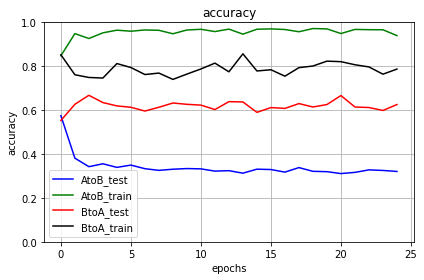

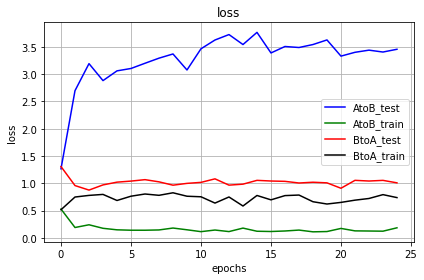

In [0]:
AtoB_train_loss=[]
AtoB_train_acc=[]
AtoB_test_loss=[]
AtoB_test_acc=[]
BtoA_train_loss=[]
BtoA_train_acc=[]
BtoA_test_loss=[]
BtoA_test_acc=[]
for i in range(repetition):
  print('%d回目' % i)
  
  model_AtoB=model()
  model_BtoA=model()
  model_AtoB.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=learningrate),
        metrics=['accuracy'])


  model_BtoA.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=learningrate),
        metrics=['accuracy'])
  
  #A->train,B->test
  model_AtoB.fit(x_a,y_a,
    batch_size=batch_s,
    epochs=epoch,
    verbose=1,
    validation_split=0.1
    )
  AtoB_train_loss.append(model_AtoB.evaluate(x_a,y_a)[0])
  AtoB_train_acc.append(model_AtoB.evaluate(x_a,y_a)[1])
  AtoB_test_loss.append(model_AtoB.evaluate(x_b,y_b)[0])
  AtoB_test_acc.append(model_AtoB.evaluate(x_b,y_b)[1])
  y_b_pred=model_AtoB.predict_classes(x_b)
  y_b_true=np.argmax(y_b,axis=1)
  # Bの正解
  #B_correct=[][]
  B_correct = [[] for _ in range(10)]
  for j in range(data_num_ab):
    for k in range(10):
      if y_b_pred[j] == k and y_b_true[j] == k:
        B_correct[k].append(j)
  

  #B->train,A->test
  model_BtoA.fit(x_b,y_b,
    batch_size=batch_s,
    epochs=epoch,
    verbose=1,
    validation_split=0.1
    )
  BtoA_train_loss.append(model_BtoA.evaluate(x_b,y_b)[0])
  BtoA_train_acc.append(model_BtoA.evaluate(x_b,y_b)[1])
  BtoA_test_loss.append(model_BtoA.evaluate(x_a,y_a)[0])
  BtoA_test_acc.append(model_BtoA.evaluate(x_a,y_a)[1])
  y_a_pred=model_BtoA.predict_classes(x_a)
  y_a_true=np.argmax(y_a,axis=1)
  # Aの間違い
  #A_miss=[][]
  A_miss = [[] for _ in range(10)]
  x_a_miss=[]
  y_a_miss=[]
  for j in range(data_num_ab):
    for k in range(10):
      if y_a_pred[j] != k and y_a_true[j] == k:
        A_miss[k].append(j)
  
  for k in range(10):
    random.shuffle(A_miss[k])
    random.shuffle(B_correct[k])
    if change_num > 0:
      if len(A_miss[k]) <= len(B_correct[k]):
        change_max=len(A_miss[k])
      else:
        change_max=len(B_correct[k])
      
      if change_max > change_num:
        change_max = change_num
      
      for j in range(change_max):
        x_a[A_miss[k][j]],x_b[B_correct[k][j]]=x_b[B_correct[k][j]],x_a[A_miss[k][j]].copy()
        y_a[A_miss[k][j]],y_b[B_correct[k][j]]=y_b[B_correct[k][j]],y_a[A_miss[k][j]].copy()



import os


SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/sameclass/acc/data/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}/"
if not os.path.exists(SAVE_DATA_DIR_PATH):
    os.mkdir(SAVE_DATA_DIR_PATH)
with open(SAVE_DATA_DIR_PATH + f"ABtest.text", "w")as f:
  f.writelines(str(AtoB_test_acc))
with open(SAVE_DATA_DIR_PATH + f"ABtrain.text", "w")as f:
  f.writelines(str(AtoB_train_acc))
with open(SAVE_DATA_DIR_PATH + f"BAtest.text", "w")as f:
  f.writelines(str(BtoA_test_acc))
with open(SAVE_DATA_DIR_PATH + f"BAtrain.text", "w")as f:
  f.writelines(str(BtoA_train_acc))

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/sameclass/loss/data/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}/"
if not os.path.exists(SAVE_DATA_DIR_PATH):
    os.mkdir(SAVE_DATA_DIR_PATH)
with open(SAVE_DATA_DIR_PATH + f"ABtest.text", "w")as f:
  f.writelines(str(AtoB_test_loss))
with open(SAVE_DATA_DIR_PATH + f"ABtrain.text", "w")as f:
  f.writelines(str(AtoB_train_loss))
with open(SAVE_DATA_DIR_PATH + f"BAtest.text", "w")as f:
  f.writelines(str(BtoA_test_loss))
with open(SAVE_DATA_DIR_PATH + f"BAtrain.text", "w")as f:
  f.writelines(str(BtoA_train_loss))


import matplotlib.pyplot as plt


fig, ax = plt.subplots()



y1=[]
y2=[]
y3=[]
y4=[]

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/sameclass/acc/data/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}/"

with open(SAVE_DATA_DIR_PATH + f"ABtest.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y1.append(line)

y1=np.ravel(y1)

with open(SAVE_DATA_DIR_PATH + f"ABtrain.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y2.append(line)

y2=np.ravel(y2)

with open(SAVE_DATA_DIR_PATH + f"BAtest.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y3.append(line)

y3=np.ravel(y3)

with open(SAVE_DATA_DIR_PATH + f"BAtrain.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y4.append(line)

y4=np.ravel(y4)
#print(type(y1))
#print(y1)

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/sameclass/acc/picture/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}"


c1,c2,c3,c4 = "blue","green","red","black"   # 各プロットの色
l1,l2,l3,l4 = "AtoB_test","AtoB_train","BtoA_test","BtoA_train"   # 各ラベル

  # x軸ラベル
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')  # y軸ラベル
ax.set_title('accuracy') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([0, 5]) # x方向の描画範囲を指定
ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(y1, color=c1, label=l1)
ax.plot(y2, color=c2, label=l2)
ax.plot(y3, color=c3, label=l3)
ax.plot(y4, color=c4, label=l4)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
plt.savefig(SAVE_DATA_DIR_PATH + f".png") # 画像の保存
plt.show()


fig, ax = plt.subplots()



y1=[]
y2=[]
y3=[]
y4=[]

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/sameclass/loss/data/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}/"

with open(SAVE_DATA_DIR_PATH + f"ABtest.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y1.append(line)

y1=np.ravel(y1)

with open(SAVE_DATA_DIR_PATH + f"ABtrain.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y2.append(line)

y2=np.ravel(y2)

with open(SAVE_DATA_DIR_PATH + f"BAtest.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y3.append(line)

y3=np.ravel(y3)

with open(SAVE_DATA_DIR_PATH + f"BAtrain.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y4.append(line)

y4=np.ravel(y4)
#print(type(y1))
#print(y1)

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/sameclass/loss/picture/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}"


c1,c2,c3,c4 = "blue","green","red","black"   # 各プロットの色
l1,l2,l3,l4 = "AtoB_test","AtoB_train","BtoA_test","BtoA_train"   # 各ラベル

  # x軸ラベル
ax.set_xlabel('epochs')
ax.set_ylabel('loss')  # y軸ラベル
ax.set_title('loss') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([0, 5]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(y1, color=c1, label=l1)
ax.plot(y2, color=c2, label=l2)
ax.plot(y3, color=c3, label=l3)
ax.plot(y4, color=c4, label=l4)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
plt.savefig(SAVE_DATA_DIR_PATH + f".png") # 画像の保存
plt.show()